# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_excel('KDC 교육용 DATASET_공개.xlsx')
data.set_index('ID', inplace=True)
data.head()

,SEX,AGE,JOB,EDUCATION,MARRIAGE,DRINK,SMOKE,CHARACTER1,CHARACTER2,CHARACTER3,...,BODYMEAS_8HAND6,BODYMEAS_8HAND7,BODYMEAS_8HAND8,SYSTOLICBP,DIASTOLICBP,GLUCOSE,T_CHOL,TG,HDL_CHOL,LDL_CHOL
ID,,,,,,,,,,,,,,,,,,,,,
KDCT00001,2,48.666,2,5,2,999,999,2,2,1,...,82.0,91.0,96.0,120,80,104,219,72,60,128
KDCT00002,2,80.773,14,3,2,999,999,1,1,1,...,92.0,96.0,99.0,124,65,110,199,97,46,114
KDCT00003,1,50.008,3,3,2,999,999,3,1,1,...,80.0,81.0,81.0,121,75,79,216,88,49,132
KDCT00004,2,50.551,14,4,2,999,999,1,1,1,...,91.0,94.0,99.0,113,81,100,218,136,44,136
KDCT00005,1,49.581,8,2,2,999,999,3,2,3,...,98.0,98.0,100.0,129,72,92,186,61,33,118


In [2]:
data['FINALDIAGNOSIS'].value_counts()

1    200
3    175
2    125
Name: FINALDIAGNOSIS, dtype: int64

In [6]:
data = pd.read_excel('final_prediction_googoo.xlsx')
data.set_index('ID', inplace=True)
data.value_counts()

FINALDIAGNOSIS
1                 116
3                  98
2                  57
dtype: int64

In [2]:
X_data = data.replace([888,999], np.nan)
X_data.isnull().sum().sort_values(ascending=False)[:20]

DRINK          474
SMOKE          474
STOOL12_7      233
STOOL12_8      233
DIET4           79
DIET7           26
HDL_CHOL         3
LDL_CHOL         3
GLUCOSE          3
T_CHOL           3
TG               3
SWEAT3           2
CHARACTER7       1
HEALTH1          1
COLDHEAT_G       1
CHARACTER8       1
COLDHEAT_S       1
WATER1           1
CHARACTER15      0
SWEAT1           0
dtype: int64

In [3]:
X_data['SLEEP'] = X_data['SLEEP3_1'] + X_data['SLEEP3_2'] / 60

In [4]:
X_data['OBESITY'] = pd.cut(X_data['BMI'], bins=[0, 25, 100], labels=['정상', '비만'])

In [5]:
# 대사증후군
X_data['M_WC'] = np.where(((X_data['SEX'] == 1) & (X_data['BODYMEAS_8HAND6'] >= 90)) | ((X_data['SEX'] == 2) & (X_data['BODYMEAS_8HAND6'] >= 85)), 1, 0)
X_data['M_BP'] = np.where((X_data['SYSTOLICBP'] >= 130) | (X_data['DIASTOLICBP'] >= 85), 1, 0)
X_data['M_GLU'] = np.where(X_data['GLUCOSE'] >= 100, 1, 0)
X_data['M_TG'] = np.where(X_data['TG'] >= 150, 1, 0)
X_data['M_HDL'] = np.where(((X_data['SEX'] == 1) & (X_data['HDL_CHOL'] < 40)) | ((X_data['SEX'] == 2) & (X_data['HDL_CHOL'] < 50)), 1, 0)

X_data['METS'] = np.where(X_data['M_WC'] + X_data['M_BP'] + X_data['M_GLU'] + X_data['M_TG'] + X_data['M_HDL'] >= 3, 1, 0)

In [6]:
X_data = X_data.drop(['DRINK', 'SMOKE', 'STOOL12_7', 'STOOL12_8',
                      'SLEEP3_1', 'SLEEP3_2',
                      'M_WC', 'M_BP', 'M_GLU', 'M_TG', 'M_HDL',
                      'AGE', 'MARRIAGE'], axis=1)
X_data.head()

,SEX,JOB,EDUCATION,CHARACTER1,CHARACTER2,CHARACTER3,CHARACTER4,CHARACTER5,CHARACTER6,CHARACTER7,...,SYSTOLICBP,DIASTOLICBP,GLUCOSE,T_CHOL,TG,HDL_CHOL,LDL_CHOL,SLEEP,OBESITY,METS
ID,,,,,,,,,,,,,,,,,,,,,
KDCT00001,2,2,5,2,2,1,2,1,1,1.0,...,120,80,104.0,219.0,72.0,60.0,128.0,5.0,정상,0
KDCT00002,2,14,3,1,1,1,1,1,1,1.0,...,124,65,110.0,199.0,97.0,46.0,114.0,5.0,비만,1
KDCT00003,1,3,3,3,1,1,1,1,1,1.0,...,121,75,79.0,216.0,88.0,49.0,132.0,7.0,정상,0
KDCT00004,2,14,4,1,1,1,1,1,1,1.0,...,113,81,100.0,218.0,136.0,44.0,136.0,7.0,비만,1
KDCT00005,1,8,2,3,2,3,2,2,3,2.0,...,129,72,92.0,186.0,61.0,33.0,118.0,5.0,비만,0


## Fill Missing Values

In [7]:
X_data['DIET4'].fillna(X_data['DIET4'].mode().item(), inplace=True)
X_data['DIET7'].fillna(X_data['DIET7'].mode().item(), inplace=True)

In [8]:
X_data.isnull().sum().sort_values(ascending=False)[:20]

LDL_CHOL       3
HDL_CHOL       3
TG             3
T_CHOL         3
GLUCOSE        3
SWEAT3         2
COLDHEAT_S     1
CHARACTER8     1
WATER1         1
COLDHEAT_G     1
HEALTH1        1
CHARACTER7     1
DIET4          0
DIET7          0
DIGEST1        0
DIGEST3        0
STOOL1         0
SWEAT1         0
CHARACTER14    0
STOOL7         0
dtype: int64

## Drop NAs

In [9]:
X_data.dropna(axis=0, inplace=True)

## Label Encoding

In [10]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
final_diagnosis = X_data.pop('FINALDIAGNOSIS')
ordinal_encoder.fit(np.array(final_diagnosis).reshape(-1,1))
print(ordinal_encoder.categories_)

y_data = ordinal_encoder.transform(np.array(final_diagnosis).reshape(-1,1)).reshape(-1,)
print(y_data[:10])

[array([1, 2, 3])]
[1. 2. 1. 1. 0. 2. 0. 1. 1. 0.]


## Numerical Variable processing

In [11]:
num_var_list = ['COLDHEAT_S', 'WEIGHT', 'BMI', 
                'BODYMEAS_8HAND1', 'BODYMEAS_8HAND2', 'BODYMEAS_8HAND3', 'BODYMEAS_8HAND4', 'BODYMEAS_8HAND5', 'BODYMEAS_8HAND6', 'BODYMEAS_8HAND7', 'BODYMEAS_8HAND8',
                'SYSTOLICBP', 'DIASTOLICBP', 'GLUCOSE', 'T_CHOL', 'TG', 'HDL_CHOL', 'LDL_CHOL', 
                'HEALTH1', 'SLEEP',
                'COLDHEAT1', 'COLDHEAT2','COLDHEAT3', 'COLDHEAT4']
X_num = X_data.reindex(columns = num_var_list)
X_num.head()

,COLDHEAT_S,WEIGHT,BMI,BODYMEAS_8HAND1,BODYMEAS_8HAND2,BODYMEAS_8HAND3,BODYMEAS_8HAND4,BODYMEAS_8HAND5,BODYMEAS_8HAND6,BODYMEAS_8HAND7,...,T_CHOL,TG,HDL_CHOL,LDL_CHOL,HEALTH1,SLEEP,COLDHEAT1,COLDHEAT2,COLDHEAT3,COLDHEAT4
ID,,,,,,,,,,,,,,,,,,,,,
KDCT00001,12.0,55.0,22.0,53.0,33.0,92.0,96.0,89.0,82.0,91.0,...,219.0,72.0,60.0,128.0,3.0,5.0,1,2,2,2
KDCT00002,13.0,63.0,26.2,59.0,35.0,96.0,101.0,93.0,92.0,96.0,...,199.0,97.0,46.0,114.0,3.0,5.0,2,2,2,2
KDCT00003,12.0,59.0,23.0,57.0,37.0,95.0,90.0,83.0,80.0,81.0,...,216.0,88.0,49.0,132.0,3.0,7.0,3,2,3,2
KDCT00004,15.0,76.0,27.9,59.0,37.0,100.0,104.0,90.0,91.0,94.0,...,218.0,136.0,44.0,136.0,4.0,7.0,2,2,2,2
KDCT00005,11.0,70.0,25.7,60.0,40.0,106.0,102.0,99.0,98.0,98.0,...,186.0,61.0,33.0,118.0,2.0,5.0,1,3,3,2


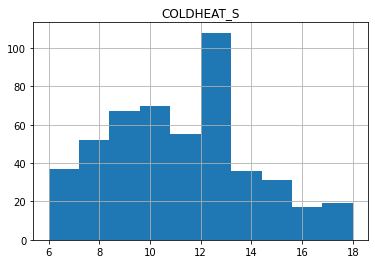

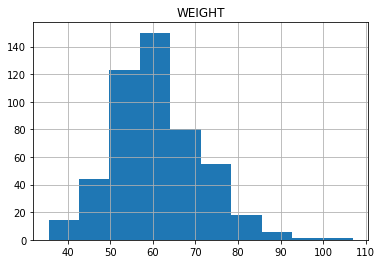

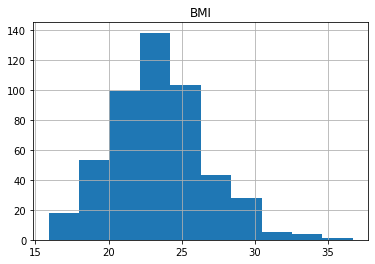

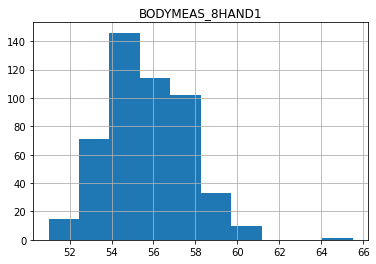

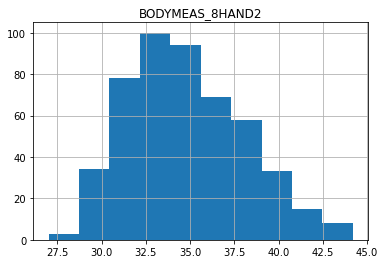

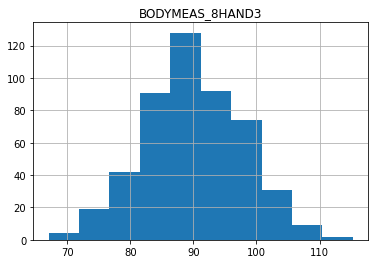

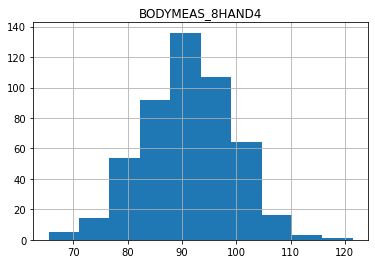

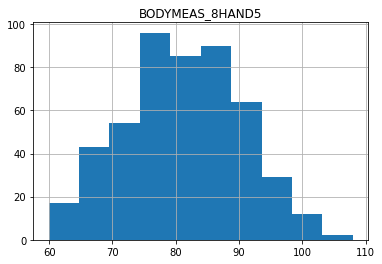

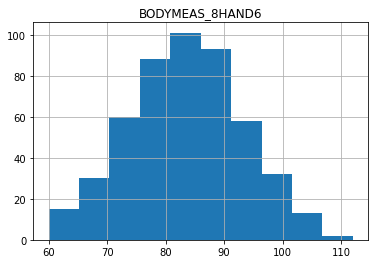

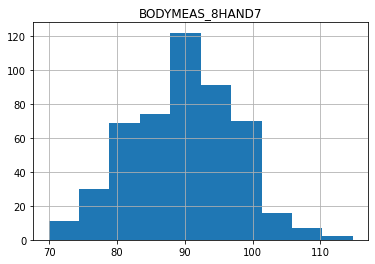

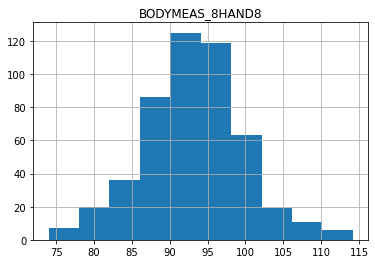

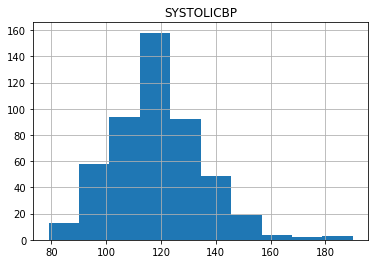

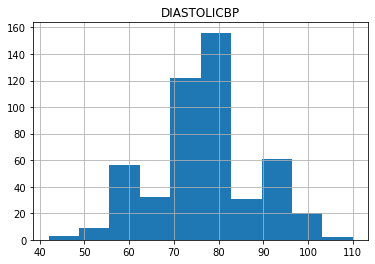

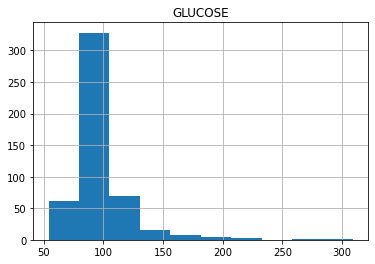

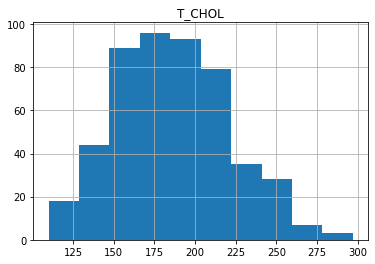

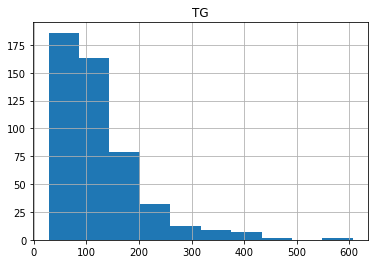

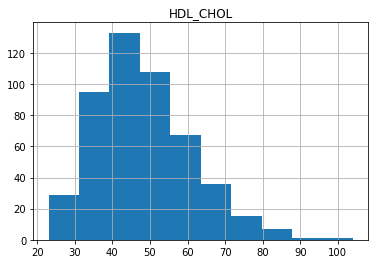

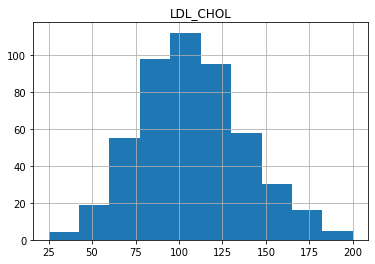

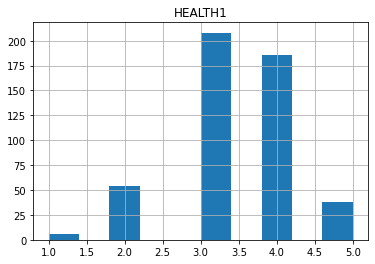

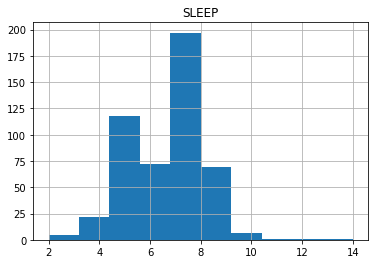

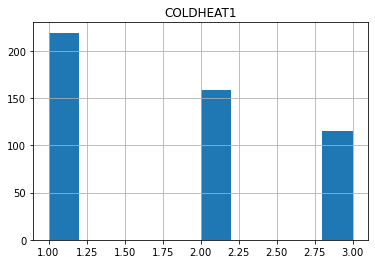

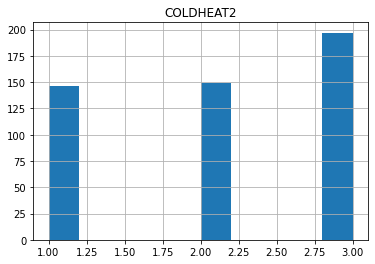

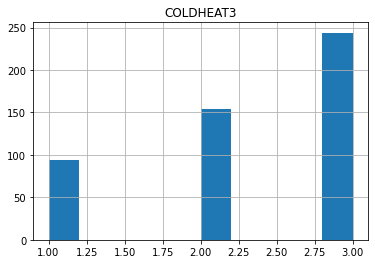

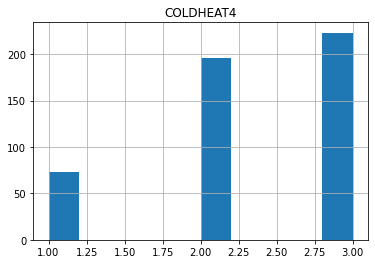

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

for column in X_num.columns:
    X_num[column].hist()
    plt.title(column)
    plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler

X_minmax_scaler = MinMaxScaler()
X_minmax_scaler.fit(X_num)
X_num_scaled = X_minmax_scaler.transform(X_num)
X_num_scaled

array([[0.5       , 0.27272727, 0.29326923, ..., 0.5       , 0.5       ,
        0.5       ],
       [0.58333333, 0.38461538, 0.49519231, ..., 0.5       , 0.5       ,
        0.5       ],
       [0.5       , 0.32867133, 0.34134615, ..., 0.5       , 1.        ,
        0.5       ],
       ...,
       [0.91666667, 0.65034965, 0.68269231, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.45874126, 0.35576923, ..., 1.        , 0.5       ,
        0.5       ],
       [0.5       , 0.3048951 , 0.35096154, ..., 0.        , 0.        ,
        0.5       ]])

In [14]:
numeric_data_df = pd.DataFrame(X_num_scaled, columns=X_num.columns)
numeric_data_df.head()

,COLDHEAT_S,WEIGHT,BMI,BODYMEAS_8HAND1,BODYMEAS_8HAND2,BODYMEAS_8HAND3,BODYMEAS_8HAND4,BODYMEAS_8HAND5,BODYMEAS_8HAND6,BODYMEAS_8HAND7,...,T_CHOL,TG,HDL_CHOL,LDL_CHOL,HEALTH1,SLEEP,COLDHEAT1,COLDHEAT2,COLDHEAT3,COLDHEAT4
0,0.500000,0.272727,0.293269,0.137931,0.348837,0.517598,0.545455,0.604990,0.423077,0.469933,...,0.582888,0.075993,0.456790,0.588571,0.50,0.250000,0.0,0.5,0.5,0.5
1,0.583333,0.384615,0.495192,0.551724,0.465116,0.600414,0.634581,0.688150,0.615385,0.581292,...,0.475936,0.119171,0.283951,0.508571,0.50,0.250000,0.5,0.5,0.5,0.5
2,0.500000,0.328671,0.341346,0.413793,0.581395,0.579710,0.438503,0.480249,0.384615,0.247216,...,0.566845,0.103627,0.320988,0.611429,0.50,0.416667,1.0,0.5,1.0,0.5
3,0.750000,0.566434,0.576923,0.551724,0.581395,0.683230,0.688057,0.625780,0.596154,0.536748,...,0.577540,0.186528,0.259259,0.634286,0.75,0.416667,0.5,0.5,0.5,0.5
4,0.416667,0.482517,0.471154,0.620690,0.755814,0.807453,0.652406,0.812890,0.730769,0.625835,...,0.406417,0.056995,0.123457,0.531429,0.25,0.250000,0.0,1.0,1.0,0.5


## Categorical Variable processing

### binary

In [15]:
binary_var_list = ['SEX', 'STOOL1', 'HYPER1', 'DIABE1', 'HYPERLI1', 
                   'OBESITY', 'METS']
X_binary = X_data.reindex(columns=binary_var_list)

In [16]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(drop='first')
binary_encoder.fit(X_binary)
X_binary_matrix = binary_encoder.transform(X_binary)
print(binary_encoder.categories_)
print(X_binary_matrix.toarray().shape)

[array([1, 2]), array([1, 2]), array([1, 2]), array([1, 2]), array([1, 2]), array(['비만', '정상'], dtype=object), array([0, 1])]
(492, 7)


In [17]:
X_cat_binary_df = pd.DataFrame(X_binary_matrix.toarray(), columns=X_binary.columns)
X_cat_binary_df.head()

,SEX,STOOL1,HYPER1,DIABE1,HYPERLI1,OBESITY,METS
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### multi

In [18]:
from sklearn.preprocessing import OneHotEncoder

multi_var_list = ['JOB', 'EDUCATION',
                  'CHARACTER1', 'CHARACTER2', 'CHARACTER3', 'CHARACTER4', 'CHARACTER5',
                  'CHARACTER6', 'CHARACTER7', 'CHARACTER8', 'CHARACTER9', 'CHARACTER10',
                  'CHARACTER11', 'CHARACTER12', 'CHARACTER13', 'CHARACTER14', 'CHARACTER15',
                  'DIGEST1', 'DIET4', 'DIET7',
                  'DIGEST3', 'SWEAT1', 'SWEAT3', 'STOOL7', 
                #  'COLDHEAT1', 'COLDHEAT2','COLDHEAT3', 'COLDHEAT4',
                  'WATER1', 'WATER3', 'COLDHEAT_G', 'FATIGUE1']
X_multi = X_data.reindex(columns=multi_var_list)

onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(X_multi)
onehot_matrix = onehot_encoder.transform(X_multi)
print(onehot_encoder.categories_)
print(onehot_matrix.toarray().shape)

[array([ 1,  2,  3,  4,  5,  6,  7,  8, 11, 12, 13, 14]), array([1, 2, 3, 4, 5, 6]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1., 2., 3.]), array([1., 2., 3.]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1., 2., 3.]), array([1., 2., 3.]), array([1, 2, 3, 4]), array([1, 2, 3]), array([1., 2., 3.]), array([1, 2, 3]), array([1., 2., 3., 4.]), array([1, 2, 3]), array([1., 2., 3.]), array([1, 2, 3, 4])]
(492, 99)


In [19]:
X_cat_multi_df = pd.DataFrame(onehot_matrix.toarray())
X_cat_multi_df.head()

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Concatenate Numerical and Categorical Variables

In [20]:
X_data_df = pd.concat([numeric_data_df, X_cat_binary_df, X_cat_multi_df], axis=1)
X_data_df

,COLDHEAT_S,WEIGHT,BMI,BODYMEAS_8HAND1,BODYMEAS_8HAND2,BODYMEAS_8HAND3,BODYMEAS_8HAND4,BODYMEAS_8HAND5,BODYMEAS_8HAND6,BODYMEAS_8HAND7,...,89,90,91,92,93,94,95,96,97,98
0,0.500000,0.272727,0.293269,0.137931,0.348837,0.517598,0.545455,0.604990,0.423077,0.469933,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.583333,0.384615,0.495192,0.551724,0.465116,0.600414,0.634581,0.688150,0.615385,0.581292,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.500000,0.328671,0.341346,0.413793,0.581395,0.579710,0.438503,0.480249,0.384615,0.247216,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.750000,0.566434,0.576923,0.551724,0.581395,0.683230,0.688057,0.625780,0.596154,0.536748,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.416667,0.482517,0.471154,0.620690,0.755814,0.807453,0.652406,0.812890,0.730769,0.625835,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.250000,0.313287,0.264423,0.296552,0.523256,0.455487,0.376114,0.484407,0.278846,0.224944,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
488,0.166667,0.089510,0.052885,0.172414,0.290698,0.134576,0.188948,0.147609,0.086538,0.135857,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
489,0.916667,0.650350,0.682692,0.482759,0.813953,0.797101,0.688057,0.827443,0.673077,0.592428,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
490,0.666667,0.458741,0.355769,0.234483,0.639535,0.627329,0.509804,0.563410,0.500000,0.436526,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [21]:
X_data = np.array(X_data_df)

print(X_data.shape, y_data.shape)

(492, 130) (492,)


# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

seed = 29233
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.1,
                                                    stratify=y_data,
                                                    random_state=seed)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(442, 130) (442,)
(50, 130) (50,)


## Data Agumentation

In [23]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=seed)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape)

(531, 130) (531,)


# Modeling

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

dt = DecisionTreeClassifier(random_state=seed)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=29233)

In [25]:
dt_pred = dt.predict(X_test)
print(dt_pred[:10])

[2. 0. 1. 1. 2. 0. 0. 0. 1. 2.]


In [26]:
dt_acc = accuracy_score(y_test, dt_pred)
print(dt_acc)

0.62


In [27]:
dt_f1 = f1_score(y_test, dt_pred, average='macro')
print(dt_f1)

0.6158249158249158


## RandomForest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_features='log2',
                           random_state=seed)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=300,
                       random_state=29233)

In [29]:
rf_pred = rf.predict(X_test)
print(rf_pred[:10])

[1. 0. 1. 1. 2. 0. 0. 0. 1. 2.]


In [30]:
rf_acc = accuracy_score(y_test, rf_pred)
print(rf_acc)

0.72


In [31]:
rf_f1 = f1_score(y_test, rf_pred, average='macro')
print(rf_f1)

0.7126295210166177


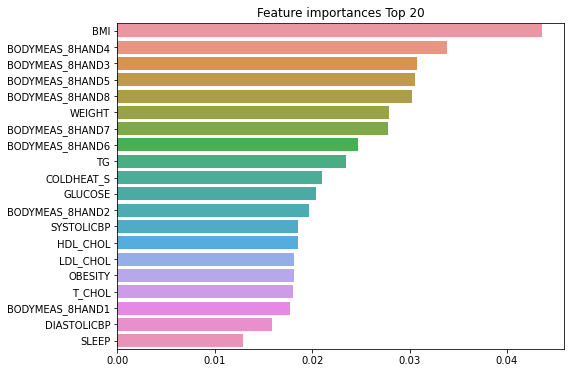

In [32]:
import seaborn as sns

importances_values = rf.feature_importances_
importances = pd.Series(importances_values, index=X_data_df.columns)

top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

## SVM

In [33]:
from sklearn.svm import SVC

svm = SVC(C=1, kernel='rbf', probability=True, random_state=seed)
svm.fit(X_train, y_train)

SVC(C=1, probability=True, random_state=29233)

In [34]:
svm_pred = svm.predict(X_test)
print(svm_pred[:10])

[2. 0. 1. 1. 2. 2. 0. 2. 1. 2.]


In [35]:
svm_acc = accuracy_score(y_test, svm_pred)
print(svm_acc)

0.68


In [36]:
svm_f1 = f1_score(y_test, svm_pred, average='macro')
print(svm_f1)

0.683019943019943


## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', solver='liblinear', random_state=seed)
lr.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=29233, solver='liblinear')

In [38]:
lr_pred = lr.predict(X_test)
print(lr_pred[:10])

[2. 0. 1. 1. 2. 2. 2. 0. 1. 2.]


In [39]:
lr_acc = accuracy_score(y_test, lr_pred)
print(lr_acc)

0.66


In [40]:
lr_f1 = f1_score(y_test, lr_pred, average='macro')
print(lr_f1)

0.6638095238095238


## GBM

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=500, max_depth=8, random_state=seed)
gbm.fit(X_train, y_train)

gbm_pred = gbm.predict(X_test)
print(gbm_pred[:10])

[2. 0. 2. 1. 2. 0. 0. 0. 1. 2.]


In [42]:
gbm_acc = accuracy_score(y_test, gbm_pred)
print(gbm_acc)

0.66


In [43]:
gbm_f1 = f1_score(y_test, gbm_pred, average='macro')
print(gbm_f1)

0.639520202020202


## AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 150, learning_rate = 0.1, random_state=seed)
ada.fit(X_train, y_train)

ada_pred = ada.predict(X_test)
print(ada_pred[:10])

[2. 0. 1. 2. 2. 2. 0. 0. 1. 2.]


In [45]:
ada_acc = accuracy_score(y_test, ada_pred)
print(ada_acc)

0.66


In [46]:
ada_f1 = f1_score(y_test, ada_pred, average='macro')
print(ada_f1)

0.6533142037302726


## XGBoost

In [47]:
import xgboost as xgb
print(xgb.__version__)

xgb_clf = xgb.XGBClassifier(learning_rate=0.3, max_depth=15, n_estimators=300,
                            use_label_encoder=False, random_state=seed)
xgb_clf.fit(X_train, y_train, verbose=False)

xgb_pred = xgb_clf.predict(X_test)
print(xgb_pred[:10])

1.3.3
[22:51:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[2 0 1 1 2 0 0 0 1 2]


In [48]:
xgb_acc = accuracy_score(y_test, xgb_pred)
print(xgb_acc)

0.72


In [49]:
xgb_f1 = f1_score(y_test, xgb_pred, average='macro')
print(xgb_f1)

0.7139041514041514


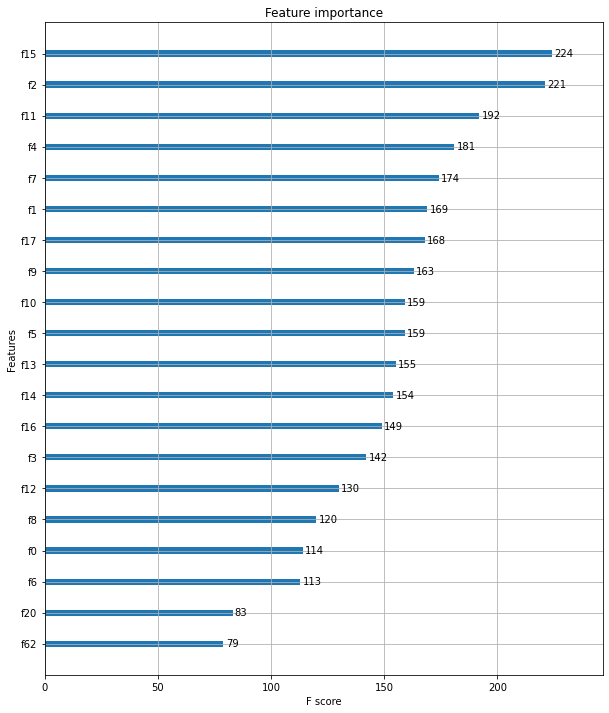

In [50]:
from xgboost import plot_importance

plot_importance(xgb_clf, max_num_features=20)

fig = plt.gcf()
fig.set_size_inches(10, 12)

## LightGBM

In [51]:
import lightgbm as lgb


lgb_clf = lgb.LGBMClassifier(n_estimators=1000, learning_rate=0.2, max_depth=8,
                             num_leaves = 50, random_state=seed)
lgb_clf.fit(X_train, y_train,
            eval_set=[(X_test, y_test)],
            early_stopping_rounds=1000,
            verbose = False)

LGBMClassifier(learning_rate=0.2, max_depth=8, n_estimators=1000, num_leaves=50,
               random_state=29233)

In [52]:
lgb_pred = lgb_clf.predict(X_test)
print(lgb_pred[:10])

[2. 0. 2. 1. 2. 0. 0. 0. 1. 2.]


In [53]:
lgb_acc = accuracy_score(y_test, lgb_pred)
print(lgb_acc)

0.76


In [54]:
lgb_f1 = f1_score(y_test, lgb_pred, average='macro')
print(lgb_f1)

0.7597295743373184


# Model Comparision

In [55]:
model_result = pd.DataFrame({
    'Model': ['Logstic Regression', 'SVM', 'Decision Tree', 'RandomForest',
              'GBM', 'AdaBoost', 'XGBoost', 'LightGBM'],
    'Accuracy': [lr_acc, svm_acc, dt_acc, rf_acc,
              gbm_acc, ada_acc, xgb_acc, lgb_acc],
    'F1 Score': [lr_f1, svm_f1, dt_f1, rf_f1,
              gbm_f1, ada_f1, xgb_f1, lgb_f1]})
model_result.sort_values(by='F1 Score', ascending=False)

,Model,Accuracy,F1 Score
7,LightGBM,0.76,0.759730
6,XGBoost,0.72,0.713904
3,RandomForest,0.72,0.712630
1,SVM,0.68,0.683020
0,Logstic Regression,0.66,0.663810
5,AdaBoost,0.66,0.653314
4,GBM,0.66,0.639520
2,Decision Tree,0.62,0.615825


# Ensemble

In [56]:
import torch
from sklearn.metrics import accuracy_score, f1_score

class EnsembleClassifier:
    def __init__(self, models, voting='soft', weights=None):
        
        self.models = models
        self.voting = voting
        self.weights = weights
        
    def predict(self, X_test): 
        pred_list = []
        for model in models.values():
            pred_list.append(model.predict_proba(X_test))
        preds = np.array(pred_list)
        
        if self.voting == 'soft':
            prediction = np.average(preds, axis=0, weights=self.weights)
        elif self.voting == 'hard':
            pass
        
        return prediction
    
    def random_search(self, X_test, y_test, num_search):
        weights = torch.softmax(torch.rand(num_search, len(self.models)), axis=1).numpy()
        
        pred_list = []
        for model in models.values():
            pred_list.append(model.predict_proba(X_test))
        preds = np.array(pred_list)
              
        acc = []
        f1 = []
        for i in range(num_search):
            prediction = np.average(preds, axis=0, weights=weights[i])
            acc_ = accuracy_score(y_test, prediction.argmax(axis=1))
            f1_ = f1_score(y_test, prediction.argmax(axis=1), average='macro')
            acc.append(acc_)
            f1.append(f1_)
            
        result = pd.DataFrame(weights)
        result['Accuracy'] = acc
        result['F1 Score'] = f1

        return result.sort_values('F1 Score', ascending=False)

In [57]:
models = {'RandomForest' : rf, 'SVM' : svm, 'LightGBM' : lgb_clf}

ensemble = EnsembleClassifier(models, voting='soft', weights=None)
result = ensemble.random_search(X_test, y_test, 30000)
result

,0,1,2,Accuracy,F1 Score
15000,0.234182,0.257878,0.507940,0.78,0.783768
5639,0.197913,0.399559,0.402528,0.78,0.783768
25268,0.214971,0.450676,0.334353,0.78,0.783768
19425,0.248837,0.432707,0.318456,0.78,0.783768
5654,0.261388,0.241811,0.496801,0.78,0.783768
...,...,...,...,...,...
25868,0.287728,0.506183,0.206089,0.72,0.715909
29101,0.262355,0.518097,0.219548,0.72,0.715909
20754,0.274062,0.526363,0.199575,0.72,0.715909
20956,0.279112,0.515446,0.205442,0.72,0.715909


In [58]:
optimal_weight = np.round(result.iloc[0,:-2], 3).tolist()
print(optimal_weight)

[0.234, 0.258, 0.508]


In [59]:
ensemble = EnsembleClassifier(models, weights=optimal_weight)

preds = ensemble.predict(X_test)
print(preds[:10])

[[0.19342283 0.27171755 0.53485962]
 [0.55421606 0.07422631 0.37155763]
 [0.15668601 0.44945252 0.39386147]
 [0.12285553 0.68219583 0.19494864]
 [0.32740681 0.13830734 0.53428585]
 [0.46405769 0.13781675 0.39812556]
 [0.76682501 0.04486107 0.18831392]
 [0.46484555 0.17772207 0.35743238]
 [0.17909657 0.58165271 0.23925073]
 [0.19420988 0.17538241 0.63040772]]


In [60]:
accuracy = accuracy_score(y_test, preds.argmax(axis=1))
f1 = f1_score(y_test, preds.argmax(axis=1), average='macro')
print('앙상블 모델 정확도: {:.4f}'.format(accuracy))
print('앙상블 모델 F1-score: {:.4f}'.format(f1))

앙상블 모델 정확도: 0.7800
앙상블 모델 F1-score: 0.7838


# Prediction

In [61]:
def predict(file_path):
    data = pd.read_excel(file_path)
    data.set_index('ID', inplace=True)
    
    # preprocessing
    X_data = data.replace([888,999], np.nan)
    
    # fill na
    X_data['DIET4'].fillna(X_data['DIET4'].mode().item(), inplace=True)
    X_data['DIET7'].fillna(X_data['DIET7'].mode().item(), inplace=True)
    
    if X_data.isnull().sum().sum() > 0:
        print(X_data.isnull().sum().sort_values())
        X_data.fillna(X_data.median(), inplace=True)
    
    # add variables
    X_data['SLEEP'] = X_data['SLEEP3_1'] + X_data['SLEEP3_2'] / 60
    X_data['OBESITY'] = pd.cut(X_data['BMI'], bins=[0, 25, 100], labels=['정상', '비만'])
    
    ## 대사증후군
    X_data['M_WC'] = np.where(((X_data['SEX'] == 1) & (X_data['BODYMEAS_8HAND6'] >= 90)) | ((X_data['SEX'] == 2) & (X_data['BODYMEAS_8HAND6'] >= 85)), 1, 0)
    X_data['M_BP'] = np.where((X_data['SYSTOLICBP'] >= 130) | (X_data['DIASTOLICBP'] >= 85), 1, 0)
    X_data['M_GLU'] = np.where(X_data['GLUCOSE'] >= 100, 1, 0)
    X_data['M_TG'] = np.where(X_data['TG'] >= 150, 1, 0)
    X_data['M_HDL'] = np.where(((X_data['SEX'] == 1) & (X_data['HDL_CHOL'] < 40)) | ((X_data['SEX'] == 2) & (X_data['HDL_CHOL'] < 50)), 1, 0)

    X_data['METS'] = np.where(X_data['M_WC'] + X_data['M_BP'] + X_data['M_GLU'] + X_data['M_TG'] + X_data['M_HDL'] >= 3, 1, 0)
    
    X_data = X_data.drop(['DRINK', 'SMOKE', 'STOOL12_7', 'STOOL12_8',
                          'SLEEP3_1', 'SLEEP3_2',
                          'M_WC', 'M_BP', 'M_GLU', 'M_TG', 'M_HDL',
                          'AGE', 'MARRIAGE'], axis=1)

    
    # numerical variables
    X_num = X_data.reindex(columns = num_var_list)
    X_num_scaled = X_minmax_scaler.transform(X_num)
    numeric_data_df = pd.DataFrame(X_num_scaled, columns=X_num.columns)
    
    
    # binary variables
    X_binary = X_data.reindex(columns=binary_var_list)
    X_binary_matrix = binary_encoder.transform(X_binary)
    X_cat_binary_df = pd.DataFrame(X_binary_matrix.toarray(), columns=X_binary.columns)
    
    # multi categorical variables
    X_multi = X_data.reindex(columns=multi_var_list)
    onehot_matrix = onehot_encoder.transform(X_multi)
    X_cat_multi_df = pd.DataFrame(onehot_matrix.toarray())
    
    # concat
    X_data_df = pd.concat([numeric_data_df, X_cat_binary_df, X_cat_multi_df], axis=1)
    X_data = np.array(X_data_df)

    # predict
    preds = ensemble.predict(X_data).argmax(axis=1) + 1 # returns [1, 2, 3]
    
    result = pd.DataFrame({'FINALDIAGNOSIS' : preds}, index = data.index)
    
    return result

In [62]:
result = predict('testset sample.xlsx')
result

SEX            0
COLDHEAT2      0
COLDHEAT4      0
WATER3         0
HYPER1         0
            ... 
HDL_CHOL       3
STOOL12_7    233
STOOL12_8    233
SMOKE        474
DRINK        474
Length: 71, dtype: int64


,FINALDIAGNOSIS
ID,
KDCT00001,2
KDCT00002,3
KDCT00003,2
KDCT00004,2
KDCT00005,1
...,...
KDCT00496,1
KDCT00497,2
KDCT00498,3


492

In [77]:
result.to_excel('final_prediction_googoo.xlsx')